In [2]:
# importing required libraries
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
loan = pd.read_csv("loan.csv", low_memory=False)

In [4]:
# Removing columns those do not have data
loan = loan.dropna(axis=1, how='all')
loan.shape

(39717, 57)

In [5]:
# Removing columns those have 0 value more then 30%
drop_cols = loan.columns[(loan == 0).sum() > 0.30*loan.shape[1]]
loan.drop(drop_cols, axis = 1, inplace = True) 
loan.shape

(39717, 34)

In [6]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=loan.isnull().sum()

emptycol =emptycol[emptycol.values>(0.3*loan.shape[0])]
len(emptycol)

2

In [7]:
# Removing those 2 columns
loan.drop(labels=emptycol.keys(),axis=1,inplace=True)
print(len(emptycol))

2


In [8]:
# fill emp_title null values with others
loan.emp_title.fillna("Others", inplace = True)
loan.emp_title.isna().sum()

0

In [9]:
#fill emp_length with median
loan.emp_length.fillna(loan.emp_length.mean, inplace = True)
loan.emp_length.isna().sum()

0

In [10]:
# fill title null values with other
loan.title.fillna("Others", inplace = True)
loan.title.isna().sum()

0

In [11]:
# Convert revol_util to float data and fill na with median
loan.revol_util = loan.revol_util.str.slice(0, -1).map(lambda x :float(x))
loan.revol_util.fillna(loan.revol_util.mean, inplace = True)
loan.revol_util.isna().sum()

0

In [12]:
# fill last_pymnt_d mean value and convert it to date format
loan.last_pymnt_d.fillna(pd.to_datetime(loan.last_pymnt_d, format="%d-%b").mean(), inplace = True)


In [13]:
loan.last_credit_pull_d.fillna(pd.to_datetime(loan.last_credit_pull_d, format="%d-%b").mean(), inplace = True)

In [14]:
# We will remove unwanted columns from this dataset

unwanted=['url','zip_code','policy_code','application_type','member_id','id','title','emp_title','initial_list_status']

loan.drop(labels=unwanted,axis=1,inplace=True)

In [15]:
# Convert revol_util to float
loan.revol_util = loan.revol_util.str.slice(0, -1).map(lambda x :float(x))

In [16]:
# Convert interest rate to float
loan.int_rate = loan.int_rate.str.slice(0, -1).map(lambda x :float(x))

In [17]:
# Creating bins for income amount and save to income group

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

loan['annual_inc_range'] =pd.cut(loan.annual_inc,bins,labels=slot)

In [18]:
# Creating bins for loan amount

bins = [0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000,27500,30000,32500,35000]
slot = ['0-2500', '2500-5000','5000-7500','7500-10000','10000-12500', '12500-15000', '15000-17500','17500-20000',
       '20000-22500','22500-25000','25000-27500','27500-30000','30000-32500','32500 and above']

loan['loan_amnt_rang'] =pd.cut(loan.loan_amnt,bins,labels=slot)

In [38]:
# 0,100,200,300,400,500,600,700,800,900,1000,1100,1200
bins = [0,200,400,600,800,1000,1200,1400]
slot = ['0-200', '200-400','400-600','600-800','800-1000','1000-1200','1200 and above']
loan['installment_rang'] =pd.cut(loan.installment,bins,labels=slot)

In [39]:
# Let focus on Paid and defaulted loan data. Filter out Current loans data
loan_data = loan[~(loan.loan_status=='Current')]

In [40]:
paid = loan[loan.loan_status=='Fully Paid']
defaulted = loan[loan.loan_status=='Charged Off']

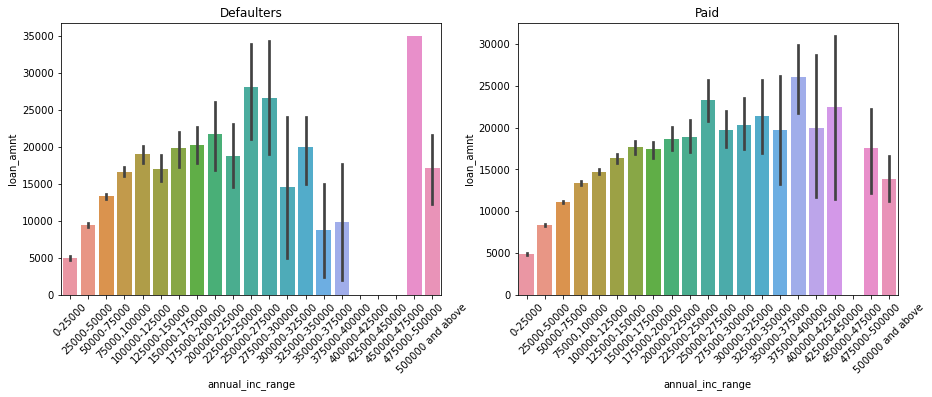

In [43]:

# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='annual_inc_range',y='loan_amnt',data=defaulted)
plt.title('Defaulters')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x='annual_inc_range',y='loan_amnt',data=paid)
plt.title('Paid')
plt.xticks(rotation=45)
plt.show()

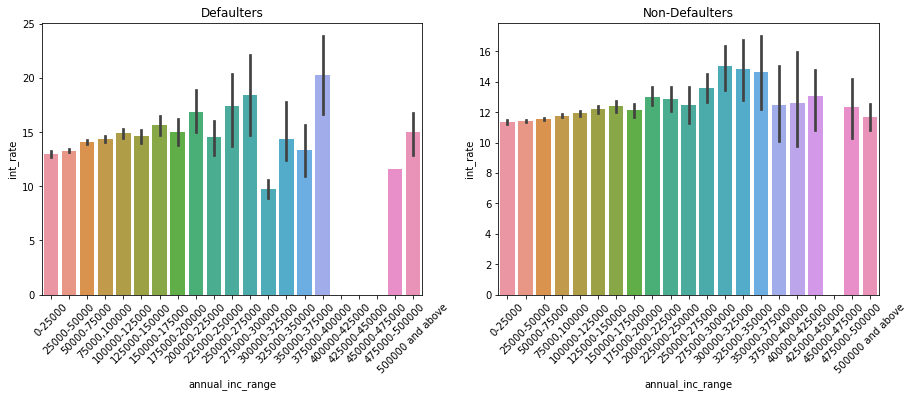

In [28]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='annual_inc_range',y='int_rate',data=defaulted)
plt.title('Defaulters')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x='annual_inc_range',y='int_rate',data=paid)
plt.title('Paid')
plt.xticks(rotation=45)
plt.show()

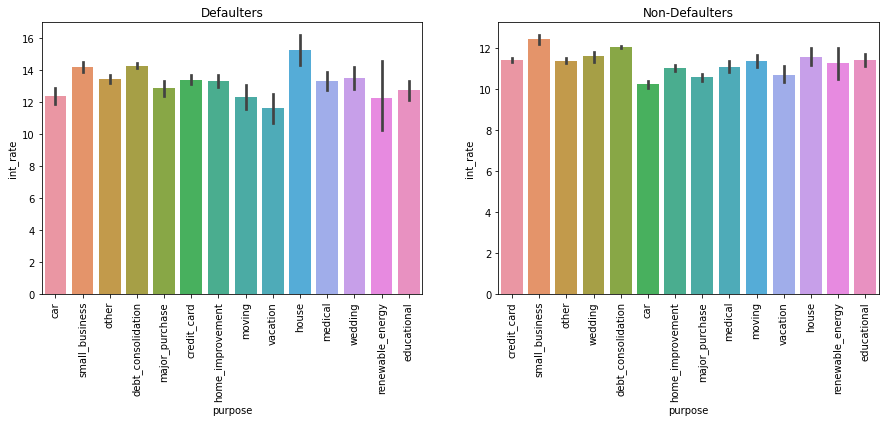

In [30]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='purpose',y='int_rate',data=defaulted)
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='purpose',y='int_rate',data=paid)
plt.title('Paid')
plt.xticks(rotation=90)
plt.show()

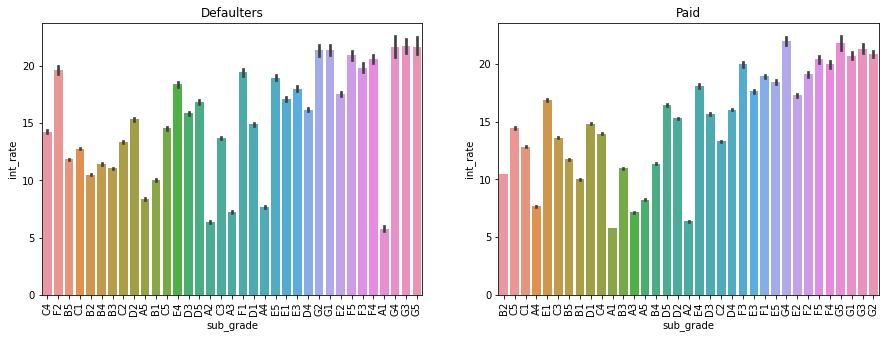

In [31]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='sub_grade',y='int_rate',data=defaulted)
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='sub_grade',y='int_rate',data=paid)
plt.title('Paid')
plt.xticks(rotation=90)
plt.show()

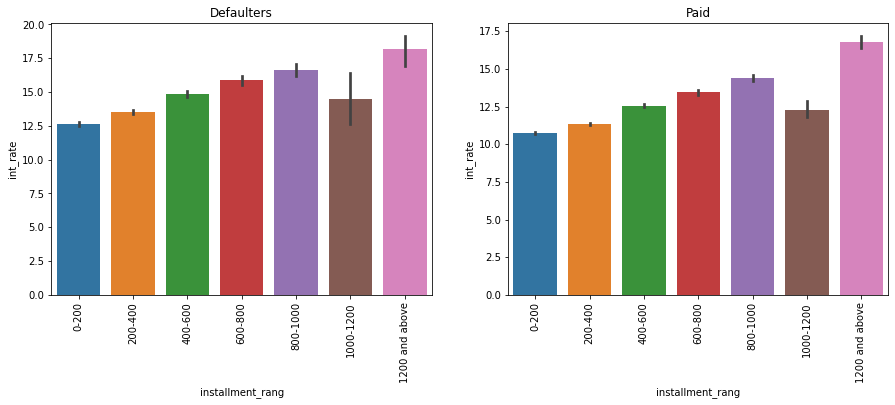

In [42]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='installment_rang',y='int_rate',data=defaulted)
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='installment_rang',y='int_rate',data=paid)
plt.title('Paid')
plt.xticks(rotation=90)
plt.show()

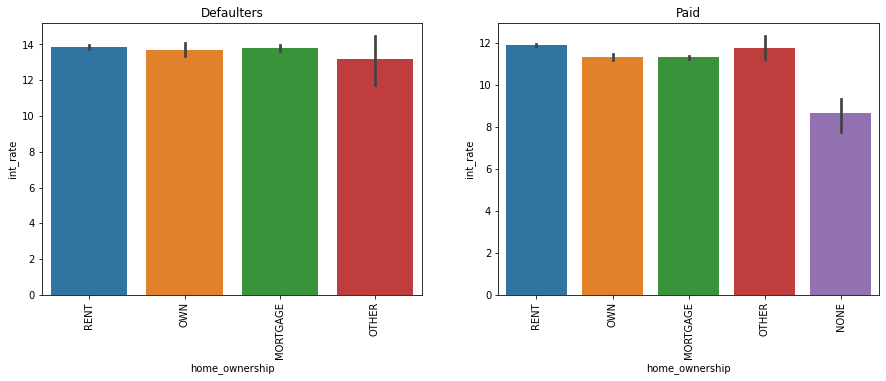

In [32]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='home_ownership',y='int_rate',data=defaulted)
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='home_ownership',y='int_rate',data=paid)
plt.title('Paid')
plt.xticks(rotation=90)
plt.show()

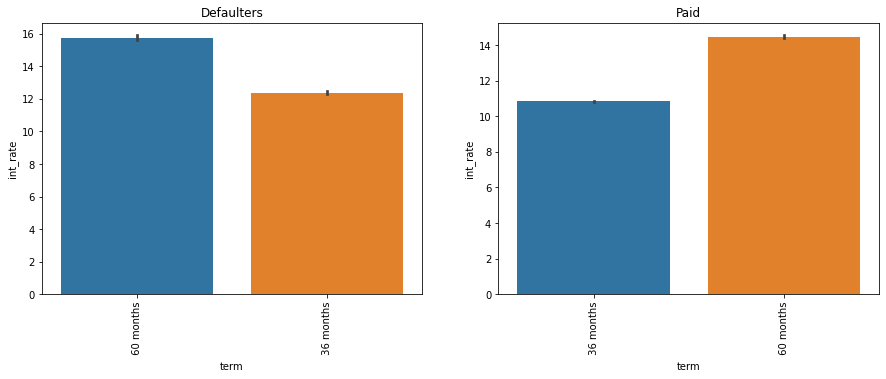

In [33]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='term',y='int_rate',data=defaulted)
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='term',y='int_rate',data=paid)
plt.title('Paid')
plt.xticks(rotation=90)
plt.show()

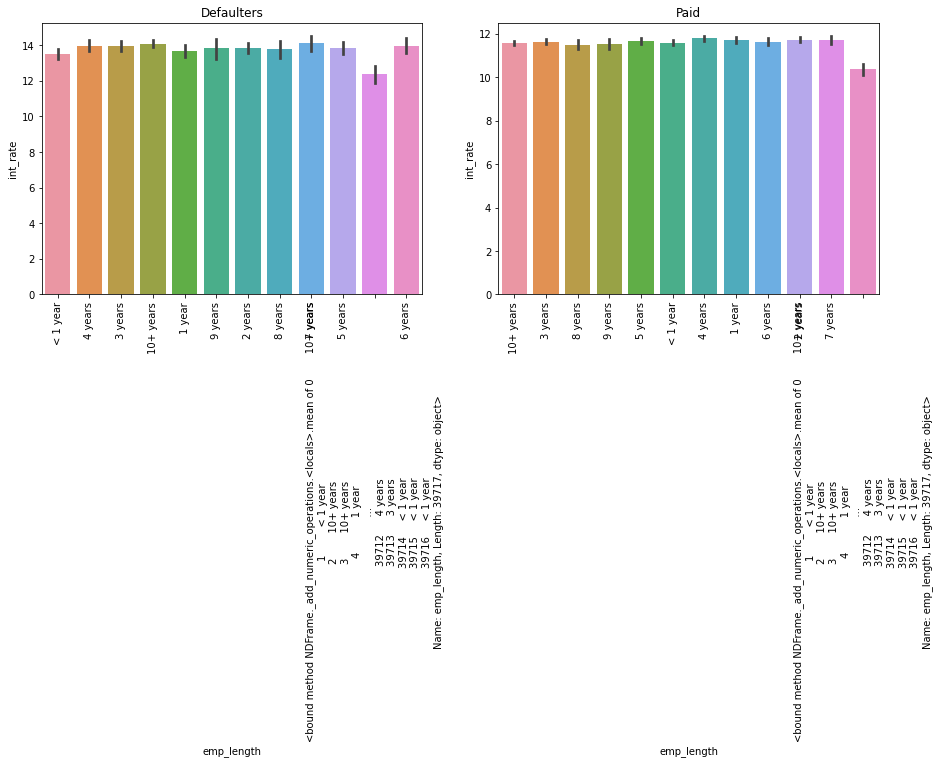

In [34]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='emp_length',y='int_rate',data=defaulted)
plt.title('Defaulters')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='emp_length',y='int_rate',data=paid)
plt.title('Paid')
plt.xticks(rotation=90)
plt.show()